In [2]:
import pandas as pd

In [4]:
df_cleaned = pd.read_csv("aliexpress_cleaned.csv")
df_cleaned

,product_name,qty_sold,sales_price,original_price,shipping_cost,store
0,Sweatpants Versatile Baggy Pants Men Woman Out...,0,10824.87,35859.15,Free shipping,Innovation Men Store
1,Summer thin Japanese baggy broad-legged overal...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store
2,Bratz Pink Printing Man Woman Pants Pocket Run...,3,11819.24,37847.88,Free shipping,Innovation Men Store
3,Spring and summer thin high street n-style ret...,0,12670.32,40358.38,Free shipping,Shop1103183813 Store
4,New York City Print Male Famale Tracksuit Pock...,0,6721.25,37847.88,Free shipping,Innovation Men Store
...,...,...,...,...,...,...
595,Men Autumn Summer Sports Running Pants Pockets...,0,9809.12,33004.36,Free shipping,Shop1103754028 Store
596,Friends Fun Letter Printed Men Women Pants Bag...,0,11641.75,37847.88,Free shipping,Innovation Men Store
597,Boys personality fashion all-in-one Japanese c...,0,12826.43,40739.02,Free shipping,Shop1103183813 Store
598,Spring and summer 2024 Japanese overalls men's...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store


## 1. Correlating quantity sold and ratings of the product

In [6]:
# check the data type
df_cleaned.dtypes

product_name       object
qty_sold            int64
sales_price       float64
original_price    float64
shipping_cost      object
store              object
dtype: object

In [7]:
# mean of sales price
df_cleaned["sales_price"].mean()

14018.520433333333

In [8]:
# mean of qty sold
df_cleaned["qty_sold"].mean()

34.391666666666666

In [9]:
# mean of original price
df_cleaned["original_price"].mean()

44943.05443333334

In [12]:
# max of sales price, qty sold and original price
df_cleaned["sales_price"].max()

33397.83

In [13]:
df_cleaned["qty_sold"].max()

3000

In [14]:
df_cleaned["original_price"].max()

65797.01

In [15]:
import matplotlib.pyplot as plt

In [22]:
df_cleaned["original_price"][0:600]

0      35859.15
1      65027.18
2      37847.88
3      40358.38
4      37847.88
         ...   
595    33004.36
596    37847.88
597    40739.02
598    65027.18
599    65797.01
Name: original_price, Length: 600, dtype: float64

In [ ]:
sales_prices = df_cleaned["original_price"][0:12]

In [34]:
sorted_df = df_cleaned.sort_values(by='original_price', ascending=False)
sorted_df[0:100]   # correct

,product_name,qty_sold,sales_price,original_price,shipping_cost,store
599,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store
377,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store
79,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store
269,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store
279,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store
...,...,...,...,...,...,...
350,Summer thin Japanese baggy broad-legged overal...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store
501,Summer thin Japanese baggy broad-legged overal...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store
531,Summer thin Japanese baggy broad-legged overal...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store
355,Spring and summer 2024 Japanese overalls men's...,0,22785.04,65027.18,Free shipping,Shop1103183813 Store


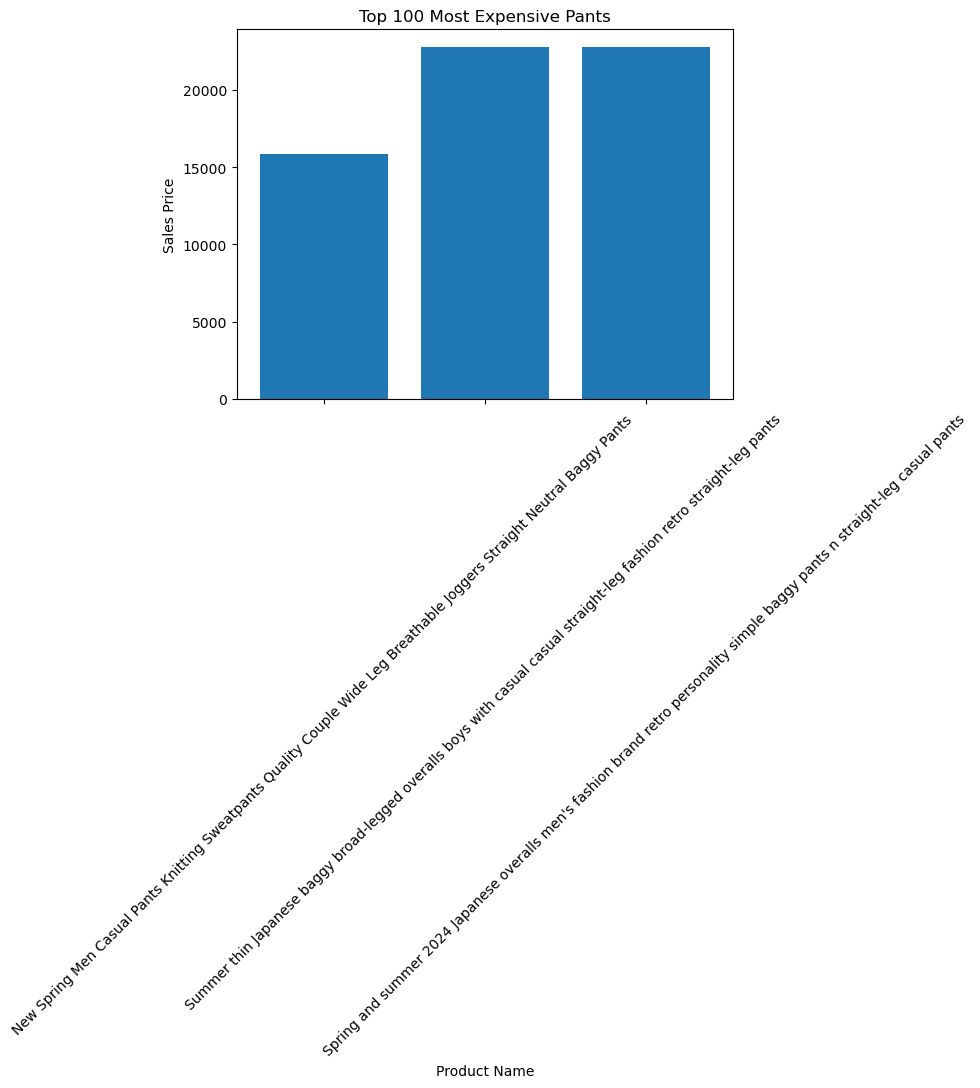

In [29]:
# this is an histogram that shows top 100 most expensive pants, the product can be the same bbut different colours or something that differs cause it is only three product that have entirely different description
plt.bar(x=sorted_df[0:100]["product_name"], height=sorted_df[0:100]["sales_price"])
plt.title("Top 100 Most Expensive Pants")
plt.xlabel("Product Name")
plt.ylabel("Sales Price")
plt.xticks(rotation=45)
plt.show()

## 2. How do the ratings of products correlate with the quantity sold?

In [35]:
# Not sure anything can be done on this cause we don't have any rating value

## 3. What is the average discount offered on Baggy and Pants products?

In [36]:
# calculate discount for all product
sorted_df["discount"] = sorted_df["original_price"] - sorted_df["sales_price"]
sorted_df["discount"]

599    49934.03
377    49934.03
79     49934.03
269    49934.03
279    49934.03
         ...   
272   -11819.24
259   -13726.51
529   -13726.51
189   -13726.51
503    -1710.73
Name: discount, Length: 600, dtype: float64

In [41]:
average_discount = sorted_df['discount'].mean()
print(f"The average discount is: {average_discount}")

The average discount is: 30924.533999999996


### 4. Which stores offer the highest discounts on their products?

In [42]:
sorted_df["discount"]

599    49934.03
377    49934.03
79     49934.03
269    49934.03
279    49934.03
         ...   
272   -11819.24
259   -13726.51
529   -13726.51
189   -13726.51
503    -1710.73
Name: discount, Length: 600, dtype: float64

In [46]:
# Calculate the average discount per store
avg_discount_per_store = sorted_df.groupby('store')['discount'].mean().reset_index()

# Sort the stores by average discount in descending order
avg_discount_per_store = avg_discount_per_store.sort_values(by='discount', ascending=False)

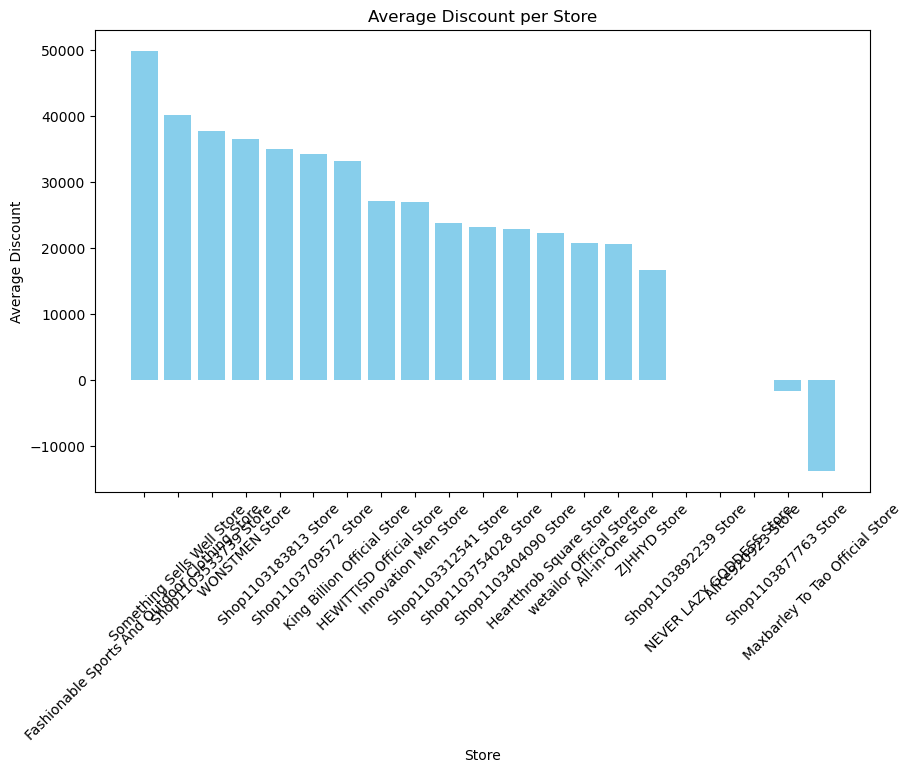

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(avg_discount_per_store['store'], avg_discount_per_store['discount'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Average Discount')
plt.title('Average Discount per Store')
plt.xticks(rotation=45)
plt.show()

### 5. How do shipping costs vary across different stores and regions?

In [49]:
 sorted_df["shipping_cost"]

599              Free shipping
377              Free shipping
79               Free shipping
269              Free shipping
279              Free shipping
                ...           
272                          0
259    +Shipping: NGN17,763.85
529    +Shipping: NGN17,763.85
189    +Shipping: NGN17,763.85
503     +Shipping: NGN20,588.7
Name: shipping_cost, Length: 600, dtype: object

** Has it has been seen that we only have "Free shipping", and other product that has shipping price in my data**

### 6. Are there any significant trends in the quantity sold based on price ranges?

In [52]:
sorted_df

,product_name,qty_sold,sales_price,original_price,shipping_cost,store,discount
599,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store,49934.03
377,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store,49934.03
79,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store,49934.03
269,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store,49934.03
279,New Spring Men Casual Pants Knitting Sweatpant...,0,15862.98,65797.01,Free shipping,Fashionable Sports And Outdoor Clothing Store,49934.03
...,...,...,...,...,...,...,...
272,Bratz Pink Printing Man Woman Pants Pocket Run...,3,11819.24,0.00,0,Innovation Men Store,-11819.24
259,Summer Cotton Men Cargo Pants Mens Joggers Bag...,0,13726.51,0.00,"+Shipping: NGN17,763.85",Maxbarley To Tao Official Store,-13726.51
529,Summer Cotton Men Cargo Pants Mens Joggers Bag...,0,13726.51,0.00,"+Shipping: NGN17,763.85",Maxbarley To Tao Official Store,-13726.51
189,Summer Cotton Men Cargo Pants Mens Joggers Bag...,0,13726.51,0.00,"+Shipping: NGN17,763.85",Maxbarley To Tao Official Store,-13726.51


In [54]:
sorted_df["qty_sold"].unique()

array([   0,  139,   40,  291,   13, 3000,   20,   11,    3,    2, 1000,
          9,    7,  900,    8,    1], dtype=int64)

### 7. What is the relationship between the original price and the sales price across different products?

In [55]:
import seaborn as sns

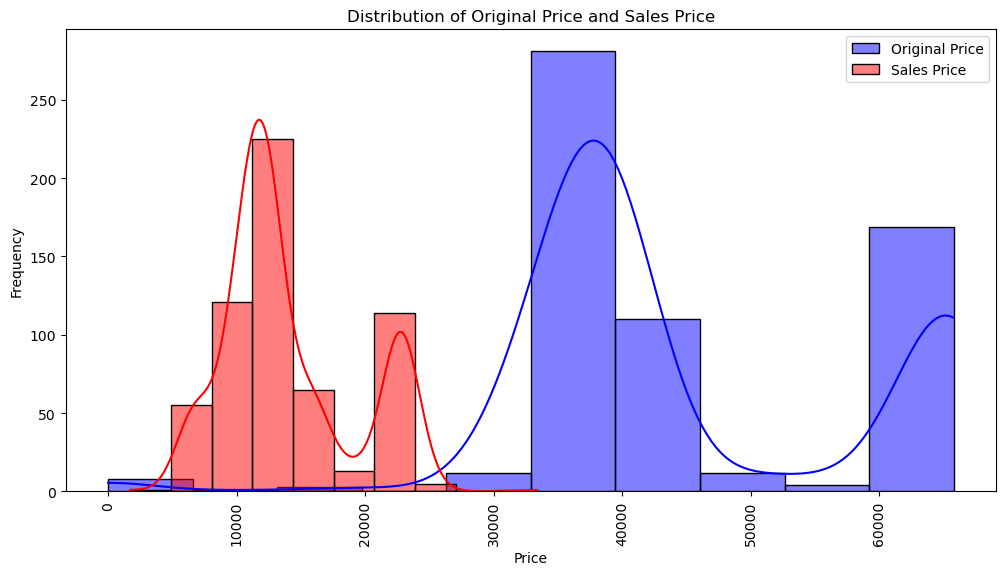

In [57]:
# Plot histogram for Original Price and Sales Price
plt.figure(figsize=(12, 6))

sns.histplot(sorted_df['original_price'], bins=10, color='blue', label='Original Price', kde=True)
sns.histplot(sorted_df['sales_price'], bins=10, color='red', label='Sales Price', kde=True)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price and Sales Price')
plt.legend()
plt.xticks(rotation=90)
# Show plot
plt.show()